In [1]:
%pylab nbagg
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from scipy import stats
from scipy.stats import rankdata
import pickle
import mne
import os
current_path = os.getcwd()

Populating the interactive namespace from numpy and matplotlib


In [7]:
red_color = plt.cm.Reds(0.6)

In [3]:
import pickle

file_path = '../data/SEEG/sub1/sub-01_run-01_Radius-100_metrics.pkl'

# Open the file in 'rb' mode (read binary)
with open(file_path, 'rb') as file:
    data_1 = pickle.load(file)

In [4]:
Entrainment_post=list(data_1['metrics_post']['max_dynamic_network_profile'].values())

In [5]:
Entrainment_pre=list(data_1['metrics_pre']['max_dynamic_network_profile'].values())

# Q1 vs rand trials

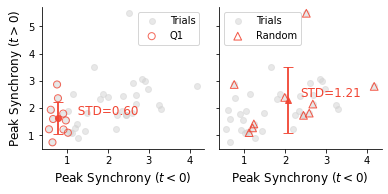

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

pre_vals = np.asarray(Entrainment_pre)
post_vals = np.asarray(Entrainment_post)


# Define Q1 and Random subsets
q1_thr = np.quantile(pre_vals, 0.25)
q1_idx = np.where(pre_vals <= q1_thr)[0]
rand_idx = np.random.choice(len(pre_vals), size=len(q1_idx), replace=False)

# Compute spreads
std_q1 = np.std(post_vals[q1_idx])
mean_q1 = np.mean(post_vals[q1_idx])
std_rand = np.std(post_vals[rand_idx])
mean_rand = np.mean(post_vals[rand_idx])

# Set global style
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.8), sharey=True)

## --- Left: Q1 subset ---
axes[0].scatter(pre_vals, post_vals, color="lightgray", alpha=0.5, label='Trials')
axes[0].scatter(pre_vals[q1_idx], post_vals[q1_idx],
                facecolor="none", alpha=0.8, edgecolor=red_color, s=50, label='Q1')
# Spread as vertical error bar
axes[0].errorbar(x=np.mean(pre_vals[q1_idx]), y=mean_q1,
                 yerr=std_q1, fmt="o", color=red_color,
                 capsize=5, lw=2, alpha=0.9)
axes[0].text(np.mean(pre_vals[q1_idx])+0.3, mean_q1, f"  STD={std_q1:.2f}",
             fontsize=12, color=red_color, va="bottom")
axes[0].legend()

## --- Right: Random subset ---
axes[1].scatter(pre_vals, post_vals, color="lightgray", alpha=0.5, label='Trials')
axes[1].scatter(pre_vals[rand_idx], post_vals[rand_idx],
                facecolor="none", edgecolor=red_color, alpha=0.9, marker="^", s=60, label='Random')
# Spread as vertical error bar
axes[1].errorbar(x=np.mean(pre_vals[rand_idx]), y=mean_rand,
                 yerr=std_rand, fmt="^", color=red_color,
                 capsize=5, lw=2, alpha=0.9)
axes[1].text(np.mean(pre_vals[rand_idx])+0.3, mean_rand, f"STD={std_rand:.2f}",
             fontsize=12, color=red_color, va="bottom")
#axes[1].set_title("Random trials", fontsize=13)
axes[1].legend(loc='upper left')

# Shared labels
for ax in axes:
    ax.set_xlabel("Peak Synchrony ($t<0$)", fontsize=12)
axes[0].set_ylabel("Peak Synchrony ($t>0$)", fontsize=12)

plt.tight_layout()
plt.show()


In [15]:
epoched = mne.read_epochs('../data/SEEG/sub1/sub-01_run-01_epoched.fif', verbose=False).apply_baseline(baseline=(-0.3, -0.05));
dat_wake=np.swapaxes(np.swapaxes(epoched.get_data(),0,2),0,1)
dat_wake=dat_wake[:,:-1,:]
dat_wake.shape

<ipython-input-15-d563bf3a541b>:1: RuntimeWarning: This filename (../data/SEEG/sub1/sub-01_run-01_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched = mne.read_epochs('../data/SEEG/sub1/sub-01_run-01_epoched.fif', verbose=False).apply_baseline(baseline=(-0.3, -0.05));


(139, 1000, 40)

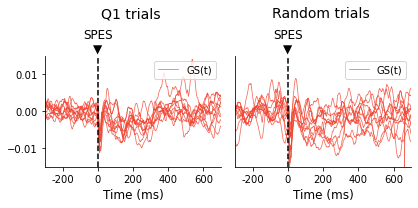

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
# Use consistent colormap (coolwarm) for the plot
cmap = plt.get_cmap("Reds_r")
colors = [cmap(-0.1+i / len(q1_idx)) for i in range(len(q1_idx))]  # Generate 185 distinct colors

plt.subplot(1,2,1)
# Compute trial average (mean over trials, axis=2)
trial_avg = np.mean(dat_wake, axis=0)[:,q1_idx].T  # Shape: (38, 1000)

# Plot each channel with matching color scheme
for i in range(trial_avg.shape[0]):
    plt.plot(1000*trial_avg[i, :], color=red_color, alpha=0.8, linewidth=.75)
    if i==0:
        plt.plot(1000*trial_avg[i, :], color=red_color, alpha=0.8, linewidth=.75, label='GS(t)')
#plt.plot(1000*np.mean(trial_avg,axis=0), color=red_color, alpha=0.9, linewidth=1.5)

# Labels and formatting
plt.xlabel("Time (ms)", fontsize=12)
#plt.ylabel("SEEG \n [$m$V]", fontsize=12)
plt.title("Q1 trials \n \n", fontsize=14)
plt.grid(False)  # Remove grid for cleaner visualization
plt.xticks([100,300,500,700,900],[-200,0, 200, 400,600])
plt.xlim(0,1000)
#plt.ylim(0.001,0.033)
plt.ylim(-0.015,0.015)
plt.axvline(300,linestyle='dashed',color='k')
plt.text(300, plt.ylim()[1] * 1.05, "SPES\n▼", fontsize=12, color='k', ha='center')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
# Compute trial average (mean over trials, axis=2)
trial_avg = np.mean(dat_wake, axis=0)[:,rand_idx].T  # Shape: (38, 1000)
# Plot each channel with matching color scheme
for i in range(trial_avg.shape[0]):
    plt.plot(1000*trial_avg[i, :], color=red_color, alpha=0.8, linewidth=.75)
    if i==0:
        plt.plot(1000*trial_avg[i, :], color=red_color, alpha=0.8, linewidth=.75, label='GS(t)')
        
# Labels and formatting
plt.xlabel("Time (ms)", fontsize=12)
#plt.ylabel("SEEG \n [$m$V]", fontsize=12)
plt.title("Random trials \n \n", fontsize=14)
plt.grid(False)  # Remove grid for cleaner visualization
plt.xticks([100,300,500,700,900],[-200,0, 200, 400,600])
plt.xlim(0,1000)
plt.yticks([])
plt.ylim(-0.015,0.015)
plt.axvline(300,linestyle='dashed',color='k')
plt.text(300, plt.ylim()[1] * 1.05, "SPES\n▼", fontsize=12, color='k', ha='center')
plt.legend(loc='upper right')


plt.tight_layout()
#plt.savefig(path_fig_out+'EEG_Trial_average_P1_S1.png', dpi=300, transparent=True)  # Transparent PNG
plt.show()


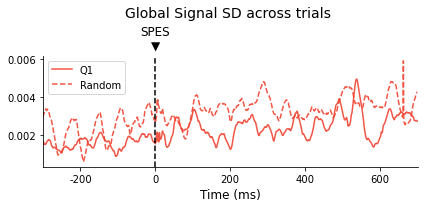

In [20]:
plt.figure(figsize=(6, 3))

cmap = plt.get_cmap("Reds_r")
colors = [cmap(-0.1+i / len(q1_idx)) for i in range(len(q1_idx))]  # Generate 185 distinct colors

# Compute trial average (mean over trials, axis=2)
trial_avg = np.mean(dat_wake, axis=0)[:,q1_idx].T  # Shape: (38, 1000)


plt.plot(1000*np.std(trial_avg,axis=0), color=red_color, alpha=0.9, linewidth=1.5,label='Q1')


# Compute trial average (mean over trials, axis=2)
trial_avg = np.mean(dat_wake, axis=0)[:,rand_idx].T  # Shape: (38, 1000)

plt.plot(1000*np.std(trial_avg,axis=0), linestyle='--', color=red_color, alpha=0.9, linewidth=1.5,label='Random')

# Labels and formatting
plt.xlabel("Time (ms)", fontsize=12)
#plt.ylabel("SEEG \n [$m$V]", fontsize=12)
plt.title("Global Signal SD across trials \n \n", fontsize=14)
plt.grid(False)  # Remove grid for cleaner visualization
plt.xticks([100,300,500,700,900],[-200,0, 200, 400,600])
plt.xlim(0,1000)
#plt.yticks([])
#plt.ylim(-0.0022,0.0024)
plt.axvline(300,linestyle='dashed',color='k')
plt.text(300, plt.ylim()[1] * 1.05, "SPES\n▼", fontsize=12, color='k', ha='center')

plt.legend()

plt.tight_layout()
#plt.savefig(path_fig_out+'EEG_Trial_average_std_P1_S1.png', dpi=300, transparent=True)  # Transparent PNG
plt.show()
